### Problem Statement

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to **undergo health checks or increase awareness by visiting various stalls** (depending on the format of camp).

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

#### The Process:
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.

MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.

In [ ]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option('display.max_columns', 100)

In [ ]:
train = pd.read_csv("/content/Train.csv")
hc = pd.read_csv("/content/Health_Camp_Detail.csv")
fhc = pd.read_csv("/content/First_Health_Camp_Attended.csv")
shc = pd.read_csv("/content/Second_Health_Camp_Attended.csv")
thc = pd.read_csv("/content/Third_Health_Camp_Attended.csv")
pp = pd.read_csv("/content/Patient_Profile.csv")
test = pd.read_csv("/content/test_l0Auv8Q.csv")

In [ ]:
# Combined the train and test
combined = pd.concat([train, test], ignore_index = True)

In [ ]:
train.shape, test.shape, hc.shape, fhc.shape, shc.shape, thc.shape, pp.shape

((75278, 8), (35249, 8), (65, 6), (6218, 5), (7819, 3), (6515, 4), (37633, 11))

In [ ]:
combined.columns, hc.columns, thc.columns

(Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
        'Var3', 'Var4', 'Var5', 'Online_Follower', 'LinkedIn_Shared',
        'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
        'First_Interaction', 'City_Type', 'Employer_Category'],
       dtype='object'),
 Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
        'Category2', 'Category3'],
       dtype='object'),
 Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
        'Last_Stall_Visited_Number'],
       dtype='object'))

In [ ]:
# Lets merge patient profile with combined data

combined = pd.merge(combined, pp, on = ["Patient_ID"], how = "left", )
combined = pd.merge(combined, fhc, on = ["Patient_ID", 'Health_Camp_ID'],how = "left")
combined = pd.merge(combined, shc, on = ["Patient_ID", 'Health_Camp_ID'],how = "left")
combined = pd.merge(combined, thc, on = ["Patient_ID", 'Health_Camp_ID'],how = "left")
combined = pd.merge(combined, hc, on = ['Health_Camp_ID'],how = "left")

In [ ]:
combined.columns, combined.shape

(Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
        'Var3', 'Var4', 'Var5', 'Online_Follower', 'LinkedIn_Shared',
        'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
        'First_Interaction', 'City_Type', 'Employer_Category', 'Donation',
        'Health_Score', 'Unnamed: 4', 'Health Score', 'Number_of_stall_visited',
        'Last_Stall_Visited_Number', 'Camp_Start_Date', 'Camp_End_Date',
        'Category1', 'Category2', 'Category3'],
       dtype='object'),
 (110527, 29))

In [ ]:
combined.drop(["Donation", "Unnamed: 4"], axis = 1, inplace = True)

In [ ]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,06-Dec-04,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,22-Jun-04,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,04-Jul-03,I,Technology,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [ ]:
import warnings
warnings.filterwarnings("ignore")

combined['Registration_Date'] = pd.to_datetime(combined['Registration_Date'],
                                               dayfirst = True)

In [ ]:
combined["Reg_Date"] = combined.Registration_Date.dt.day
combined["Reg_Month"] = combined.Registration_Date.dt.month
combined["Reg_Year"] = combined.Registration_Date.dt.year

In [ ]:
# First_Interaction, Camp_Start_Date, Camp_End_Date
combined['First_Interaction'] = pd.to_datetime(combined['First_Interaction'],
                                               dayfirst = True)

combined['Camp_Start_Date'] = pd.to_datetime(combined['Camp_Start_Date'],
                                               dayfirst = True)

combined['Camp_End_Date'] = pd.to_datetime(combined['Camp_End_Date'],
                                               dayfirst = True)

In [ ]:
# First Interaction vs Registration
combined["First_Int_Days"] = (combined["Registration_Date"] - \
                              combined['First_Interaction']).dt.days

In [ ]:
combined["Camp_Duration"] = (combined["Camp_End_Date"] - \
                              combined['Camp_Start_Date']).dt.days

In [ ]:
# Wait time Since Registration:
# Camp Start Date - Registration Date
combined["Wait_Time_RD"] = np.abs((combined["Camp_Start_Date"]-
                            combined["Registration_Date"]).dt.days)

In [ ]:
# Wait Time Since First Interaction: Camp Start Date - First Interaction Date
combined["Wait_Time_FI"] = np.abs((combined["Camp_Start_Date"]-
                            combined["First_Interaction"]).dt.days)

In [ ]:
# Total Duration = CampEnd Date - First Interaction Date

combined["Total_Duration"] = np.abs((combined["Camp_End_Date"]-
                            combined["First_Interaction"]).dt.days)

In [ ]:
combined["Wait_Time_EndRD"] = np.abs((combined["Camp_End_Date"]-
                            combined["Registration_Date"]).dt.days)

In [ ]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Reg_Date,Reg_Month,Reg_Year,First_Int_Days,Camp_Duration,Wait_Time_FI,Wait_Time_RD,Total_Duration,Wait_Time_EndRD
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,10.0,9.0,2005.0,278.0,59,253,25.0,312,34.0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,18.0,8.0,2005.0,344.0,59,342,2.0,401,57.0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,29.0,4.0,2006.0,676.0,751,482,194.0,1233,557.0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,7.0,2.0,2004.0,0.0,17,6,6.0,11,11.0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,28.0,2.0,2006.0,970.0,4,1000,30.0,1004,34.0


In [ ]:
combined.Patient_ID.nunique(), combined.Health_Camp_ID.nunique()

(36692, 65)

In [ ]:
# No Patients Registering per day/month/year
combined["Patient_Reg_Per_Day"] = combined.groupby("Patient_ID")\
 ["Reg_Date"].transform("nunique")

combined["Patient_Reg_Per_Month"] = combined.groupby("Patient_ID")\
 ["Reg_Month"].transform("nunique")

combined["Patient_Reg_Per_Year"] = combined.groupby("Patient_ID")\
 ["Reg_Year"].transform("nunique")

In [ ]:
# Patients in healthcamp
combined["Patient_Per_HC"] = combined.groupby("Health_Camp_ID")\
 ["Patient_ID"].transform("nunique")

In [ ]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Reg_Date,Reg_Month,Reg_Year,First_Int_Days,Camp_Duration,Wait_Time_FI,Wait_Time_RD,Total_Duration,Wait_Time_EndRD,Patient_Reg_Per_Day,Patient_Reg_Per_Month,Patient_Reg_Per_Year,Patient_Per_HC
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,10.0,9.0,2005.0,278.0,59,253,25.0,312,34.0,9,7,3,2837
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,18.0,8.0,2005.0,344.0,59,342,2.0,401,57.0,16,12,4,2837
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,29.0,4.0,2006.0,676.0,751,482,194.0,1233,557.0,5,4,2,3597
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,7.0,2.0,2004.0,0.0,17,6,6.0,11,11.0,4,4,3,1882
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,28.0,2.0,2006.0,970.0,4,1000,30.0,1004,34.0,17,9,4,3823


In [ ]:
# Social Media Profile
combined["Social+Media"] = combined['Online_Follower']+\
combined['Facebook_Shared']+combined['Twitter_Shared']+combined['LinkedIn_Shared']

In [ ]:
combined.City_Type.unique()

# Dealing with Missing Values
combined.loc[combined.City_Type.isnull(), "City_Type"]="Unk"

# Factorized
combined["City_Type"] = pd.Series(pd.factorize(combined.City_Type)[0])

In [ ]:
mapp = {"First":1, "Second":2, "Third":3}
combined["Category1"] = combined["Category1"].map(mapp)

In [ ]:
# Health Score & Stall Visit...
# 'Health_Score','Health Score', 'Number_of_stall_visited', 'Last_Stall_Visited_Number'
def target(a,b,c,d):
  if (a>0)|(b>0)|(c>0)|(d>0):
    return(1)
  else:
    return(0)

In [ ]:
# Creation of target variable...
combined["Target"] = combined.apply(lambda x:target(x['Health_Score'], x['Health Score'],
                               x['Number_of_stall_visited'],
                               x['Last_Stall_Visited_Number']), axis = 1)


In [ ]:
combined.Target.value_counts(normalize = True)

Target
0    0.814217
1    0.185783
Name: proportion, dtype: float64

In [ ]:
# Category2
combined['Category2'] = pd.Series(pd.factorize(combined['Category2'])[0])

# Employer_Category
combined['Employer_Category'] = pd.Series(pd.factorize(combined['Employer_Category'])[0])


In [ ]:
combined.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'First_Interaction', 'City_Type',
       'Employer_Category', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
       'Category2', 'Category3', 'Reg_Date', 'Reg_Month', 'Reg_Year',
       'First_Int_Days', 'Camp_Duration', 'Wait_Time_FI', 'Wait_Time_RD',
       'Total_Duration', 'Wait_Time_EndRD', 'Patient_Reg_Per_Day',
       'Patient_Reg_Per_Month', 'Patient_Reg_Per_Year', 'Patient_Per_HC',
       'Social+Media', 'Target'],
      dtype='object')

In [ ]:
combined.drop(['Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
               'Facebook_Shared', 'Income', 'Education_Score',
               'Age', 'Health_Score', 'Health Score',
               'Number_of_stall_visited', 'Last_Stall_Visited_Number'],
              axis = 1, inplace=True)

In [ ]:
combined.isnull().sum()[combined.isnull().sum()!=0].index

Index(['Registration_Date', 'Reg_Date', 'Reg_Month', 'Reg_Year',
       'First_Int_Days', 'Wait_Time_RD', 'Wait_Time_EndRD'],
      dtype='object')

In [ ]:
combined.drop(['Registration_Date', 'Reg_Date', 'Reg_Month', 'Reg_Year',
       'First_Int_Days', 'Wait_Time_RD', 'Wait_Time_EndRD'], axis = 1, inplace = True)

In [ ]:
combined.drop(['Patient_ID', 'Health_Camp_ID', 'Camp_Start_Date',
               'Camp_End_Date', 'First_Interaction'], axis = 1, inplace = True)

In [ ]:
# Split the Data in Train and Test
newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[train.shape[0]:, :]

combined.shape, newtrain.shape, newtest.shape, train.shape, test.shape

((110527, 19), (75278, 19), (35249, 19), (75278, 8), (35249, 8))

In [ ]:
# drop the target from test set
newtest.drop("Target", axis = 1, inplace = True)

### Stacking Model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [118]:
def base_models():
  models = dict()
  models["Logreg"] = LogisticRegression()
  models["RF"] = RandomForestClassifier()
  models["GBM"] = GradientBoostingClassifier()
  models["XGBOOST"] = XGBClassifier()
  models["LGBM"] = LGBMClassifier()
  return models


In [120]:
# Function to evaluate the models...
from sklearn.model_selection import cross_val_score
def eval_models(model):
  cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=5042024)
  score = cross_val_score(estimator = model,
                           X = X, y = y,
                           scoring = "roc_auc", n_jobs = -1)
  return(score)

In [121]:
X = newtrain.drop("Target", axis = 1)
y = newtrain["Target"]

# Lets use the function to calculate the scores...
models = base_models()
results, modelname = list(), list()

for name, mymodel in models.items():
  finalscore = eval_models(mymodel)# it will evaluate the model on the data
  results.append(finalscore) # append the final score....
  modelname.append(name)
  print(name, np.mean(finalscore))

Logreg 0.7415212280108332
RF 0.8690053148286296
GBM 0.8502872998201617
XGBOOST 0.8631005051881878
LGBM 0.8611288754813213


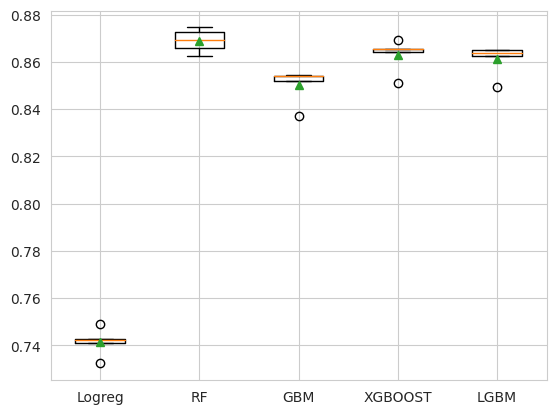

In [122]:
plt.boxplot(x = results, labels = modelname, showmeans = True)
plt.show()

In [134]:
# Stacking Model
from sklearn.ensemble import StackingClassifier
rf = RandomForestClassifier()
lgbm = LGBMClassifier(n_estimators=550,
                     learning_rate=0.03,
                     min_child_samples=40,
                     random_state=1,
                     colsample_bytree=0.5,
                     reg_alpha=2,
                     reg_lambda=2)
xgb = XGBClassifier()

stack = StackingClassifier(estimators = [("XGB", xgb), ("LGBM", lgbm)],
                           final_estimator = rf)

prediction = stack.fit(X, y).predict_proba(newtest)[:, 1]

[LightGBM] [Info] Number of positive: 20534, number of negative: 54744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 75278, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272776 -> initscore=-0.980586
[LightGBM] [Info] Start training from score -0.980586
[LightGBM] [Info] Number of positive: 16427, number of negative: 43795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 60222, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272774 -> initscore=-0.980593
[LightGBM] [Info] Start training from score -0.980593
[LightGBM] [In

Patient_ID: Unique Identifier for each patient. This ID is not sequential in nature and can not be used in modeling

Health_Camp_ID: Unique Identifier for each camp. This ID is not sequential in nature and can not be used in modeling

Outcome: Predicted probability of a favourable outcome

In [136]:
submission = pd.DataFrame({"Patient_ID": test.Patient_ID,
              'Health_Camp_ID': test.Health_Camp_ID,
              "Outcome": prediction})

submission.to_csv("StackingModelNew.csv", index = False)